# API KEY (REMOVE BEFORE PUSHING):

In [18]:
API_KEY = # API_KEY

In [19]:
# This is the code I used the first time, but I didn't want to run it again because it takes so long.
# I have preserved it in comments for documentation purposes, but know that this is how I gathered the data used in other parts of the code.
"""
import requests as rq
import random as rand

# Send a GET request with API key as a query parameter
params = {
    "api_key": API_KEY,
    "language": "en-US"
}

all_movies_data = []

movies_found = 0
movies_checked = 0
rate_limit_reached = False

while movies_found < 1000 and not rate_limit_reached:
    movie_id = rand.randint(0, 1600000)
    url = f"https://api.themoviedb.org/3/movie/{movie_id}"
    response = rq.get(url, params=params)
    movies_checked += 1
    # Check if the request was successful
    if response.status_code == 200:
        all_movies_data.append(response.json())
        movies_found += 1
    elif response.status_code == 429:
        rate_limit_reached = True
        print(f"Rate limit reached after {movies_checked} requests")

print(movies_found / movies_checked)
print(all_movies_data)
"""

0.7880220646178093
[{'adult': False, 'backdrop_path': None, 'belongs_to_collection': None, 'budget': 0, 'genres': [], 'homepage': '', 'id': 681834, 'imdb_id': None, 'origin_country': ['US'], 'original_language': 'en', 'original_title': 'Evidence', 'overview': 'A journey through a digital installation.', 'popularity': 0.0635, 'poster_path': None, 'production_companies': [], 'production_countries': [], 'release_date': '2000-12-01', 'revenue': 0, 'runtime': 6, 'spoken_languages': [], 'status': 'Released', 'tagline': '', 'title': 'Evidence', 'video': False, 'vote_average': 0.0, 'vote_count': 0}, {'adult': False, 'backdrop_path': None, 'belongs_to_collection': None, 'budget': 0, 'genres': [{'id': 18, 'name': 'Drama'}], 'homepage': '', 'id': 557262, 'imdb_id': 'tt9341090', 'origin_country': ['NL'], 'original_language': 'nl', 'original_title': 'Poor Kids', 'overview': "Twenty-year-old Max is a skipper's child and lives in a boarding school for children without a fixed home situation. During t

In [20]:
# This is also preserved solely for documentation. This is how I created a csv of the data the first time.
"""
import pandas as pd

# Create a pandas DataFrame from the collected movie data
movies_df = pd.DataFrame(all_movies_data)

# Save the DataFrame to a CSV file in your local working directory
movies_df.to_csv("movies_data.csv", index=False)
"""

In [3]:
# Read data from the csv to re-create the df
import pandas as pd
movies_df = pd.read_csv("movies_data.csv")
print("Read finished.")

Read finished.


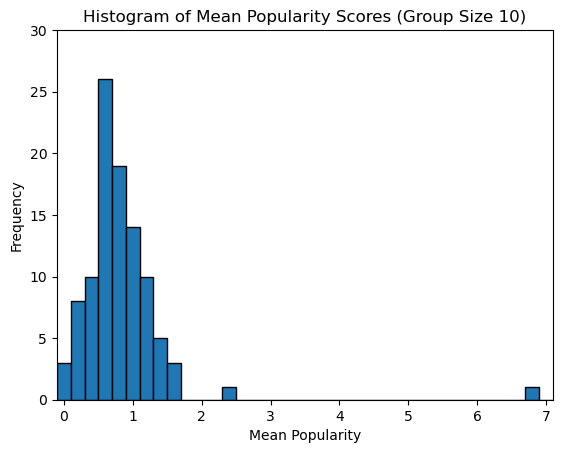

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Drop rows with missing popularity values
popularity_values = movies_df['popularity'].dropna().values

# Determine number of groups
group_size = 10
num_groups = len(popularity_values) // group_size

# Trim to make sure it divides evenly
trimmed_values = popularity_values[:num_groups * group_size]

# Reshape and compute mean for each group
grouped_means = np.mean(trimmed_values.reshape(num_groups, group_size), axis=1)

# Plot histogram of the group means
plt.hist(grouped_means, bins=36, range=(-0.1, 7.1), edgecolor='black')
plt.title('Histogram of Mean Popularity Scores (Group Size 10)')
plt.xlabel('Mean Popularity')
plt.ylabel('Frequency')
plt.xlim(-0.1, 7.1)
plt.ylim(0, 30)
plt.show()